종속변수
- 독립변수의 특정한 값에 따른 그의 값을 예측하고자 하는 변수

독립변수
- 다른 변수에 영향을 주고 그 변수의 값을 예측하려는 변수

## 공식을 활용한 단일선형회귀 a, b 구하기

In [2]:
import pandas as pd

data = {'x' : [13, 19, 16, 14, 15, 14], 
        'y' : [40, 83, 62, 48, 58, 43]}

In [4]:
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [5]:
data['x2'] = data['x'] **2
data['xy'] = data['x'] * data['y']
data

,x,y,x2,xy
0,13,40,169,520
1,19,83,361,1577
2,16,62,256,992
3,14,48,196,672
4,15,58,225,870
5,14,43,196,602


In [7]:
b = (data['xy'].sum() - len(data) * data['x'].mean() * data['y'].mean()) / \
    (data['x2'].sum() - len(data) * (data['x'].mean() **2))
b

7.32846715328465

In [11]:
a = data['y'].mean() - b * data['x'].mean()
a

-55.48175182481719

In [13]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

In [15]:
data = {'x' : [13, 19, 16, 14, 15, 14], 
        'y' : [40, 83, 62, 48, 58, 43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


이 모델이 제대로 이루어져있는가를 확인할 때

선형회귀식은 보통 R Square score를 활용하여 계산한다

0~1 사이의 값으로 나타나는데, 1에 가까울 수록 모델이 잘 만들어 진 것이다.

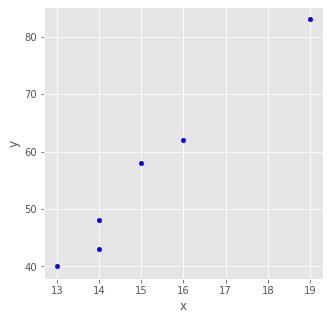

In [17]:
data.plot(kind="scatter",
         x = 'x',
         y = 'y',
         figsize = (5,5),
         color="blue")

In [18]:
linear_regression = linear_model.LinearRegression()

In [19]:
linear_regression.fit(X = pd.DataFrame(data["x"]),
                     y = data["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print("a value = ", linear_regression.intercept_)

a value =  -55.48175182481753


In [21]:
print("b value = ", linear_regression.coef_)

b value =  [7.32846715]


In [23]:
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))
prediction

array([39.78832117, 83.75912409, 61.77372263, 47.11678832, 54.44525547,
       47.11678832])

## 편차
- 데이터와 평균의 차

## 분산
- 편차 제곱을 데이터의 개수 - 1로 나눈 것
- 데이터의 차이를 하나의 숫자로 나타냄
- 분산의 기준은 평균이 되는데, 이것을 살짝 비틀어서 예측한 값을 기준으로 예측한 값과 진짜 값 간의 사이를 확인하려고 한다

## 추정의 표준오차
- 진짜 값(y<sub>i</sub>)이 예측값 기준으로 얼마나 흩어져 있나


In [24]:
residuals = data["y"] - prediction
residuals

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64

In [25]:
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [26]:
SSE = (residuals ** 2).sum()
SSE

31.03649635036502

## 추정의 표준오차 식
- 내가 예측한 것이 잘 맞나? 라는 것을 숫자 하나로 나타내기 위한 방식
- 예측값, 진짜값 사이의 거리의 제곱에 대하여 평균을 구하는 것
  - 거리는 음수가 나올 수도 있고 양수가 나올 수도 있어서 제곱을 통해 양수로 고정한다
$$
    S_e = \frac{\mathbf{SSE}}{n-2}
$$

### SSE
- 거리 제곱의 합
$$
    \mathbf{SSE} = \sum{(y_i - \hat{y}_i)^2}
$$

### SST (Sum of Square Total)
- ((진짜 값 - 예측값) + (예측값 - 진짜값 평균))^2
$$
    (y_i - \hat{y}_i + \hat{y}_i - \bar{y})^2
$$
- SST = SSE + SSR

### 결정계수
$$
    R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}
$$
- SSE가 0이면 (진짜 - 예측이 0이면) 다 맞춘 것, 그때 R^2 = 1
- SSE가 1이면 (진짜 - 예측이 최대이면) 다 틀린 것, 그때 R^2 = 0

In [27]:
SST = ((data["y"] - data["y"].mean()) ** 2 ).sum()
SST

1257.3333333333333

In [28]:
R_squared = 1-(SSE/SST)
R_squared

0.9753156179610034

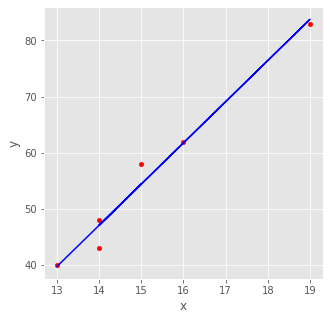

In [29]:
data.plot(kind="scatter", x = "x", y = "y", figsize=(5,5), color="red")

plt.plot(data["x"], prediction, color="blue")

In [32]:
from sklearn.metrics import mean_squared_error

print("score = ",linear_regression.score(X = pd.DataFrame(data["x"]), y=data["y"]))

print("Mean_Squared_Error = ", mean_squared_error(prediction, data['y']))

print("RMSE = ", mean_squared_error(prediction, data['y']) ** 0.5)

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736
